<img src="assets/socalo-ICDA.png">

# Python para Finanzas y Ciencia de Datos
Federico Brun | fedejbrun@gmail.com

_Jueves 15 Octubre 2020_

## Visualización de Datos en Python

<img src="https://files.realpython.com/media/How-to-Plot-With-Pandas_Watermarked.f283f64b4ae3.jpg">

_Fuente: realpython.com_

La Visualización de los Datos con que trabajamos cumple un rol muy importante a la hora de reportar y divulgar nuestro trabajo .
La capacidad de saber utilizar las herramientas de visualización no solo es util para mostrar nuestros resultados a terceros, sino que ademas puede ayudarnos y guiar nuestro trabajo.

En Python existen muchas librerías que nos asisten en esta tarea. 
En nuestro estudio de opciones veremos algunos ejemplos basicos con las opciones mas ampliamente utilizadas.

## Matplotlib

<img src="https://matplotlib.org/_static/logo2_compressed.svg"/>Matplotlib es una libreria para la generación de gráficos a partir de datos contenidos en listas o arrays en Python y su extensión matemática NumPy. Proporciona una API, pylab, diseñada para recordar a la de MATLAB. 

https://matplotlib.org/

In [1]:
import matplotlib.pyplot as plt
import numpy as np

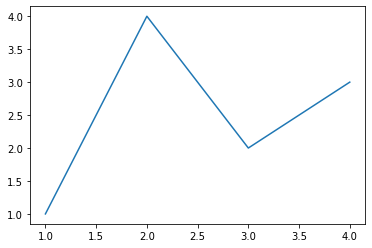

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

Podemos crear graficos cartesianos pasando como parametros dos listas, una para cada eje.

In [38]:
eje_x = [1, 2, 4, 6, 8, 9, 15, 17, 30]
eje_y = [1, 3, 5, 7, 9, 9, 10, 18, 4]

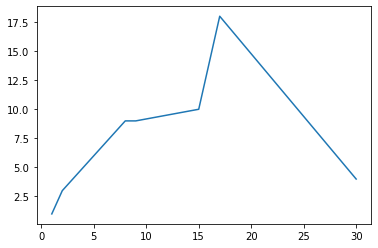

In [39]:
plt.plot(eje_x, eje_y)

Podemos cambiar el formato del grafico final.

<function matplotlib.pyplot.show(*args, **kw)>

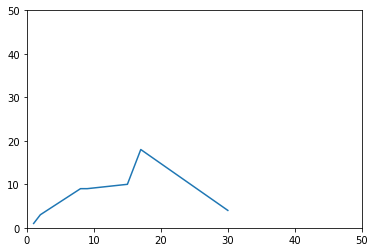

In [41]:
plt.plot(eje_x, eje_y)
plt.axis([0, 50, 0, 50])
plt.show

Podemos tambien cambiar la representacion de los puntos que mostramos.

<function matplotlib.pyplot.show(*args, **kw)>

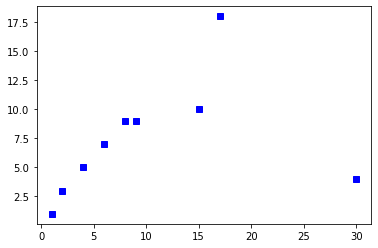

In [47]:
plt.plot(eje_x, eje_y, 'bs')
plt.show

Podemos mostrar mas de una figura en un mismo grafico.

<function matplotlib.pyplot.show(*args, **kw)>

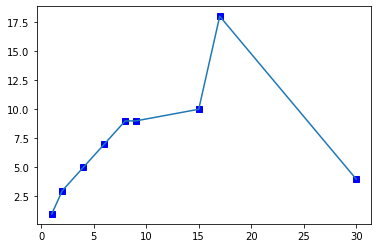

In [48]:
plt.plot(eje_x, eje_y, 'bs',eje_x, eje_y, )
plt.show

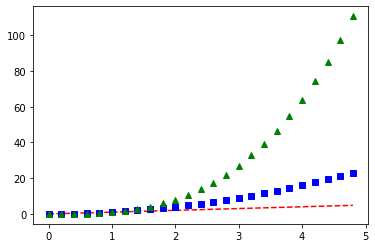

In [49]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

Y podemos trabajar con datos que almacenamos en una estructura de datos que no es una lsita, por ejemplo un diccionario o un **DataFrame** de Pandas.

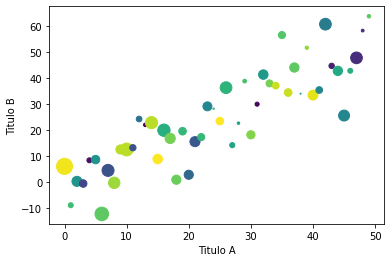

In [65]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('Titulo A')
plt.ylabel('Titulo B')
plt.show()

En un mismo grafico, podemos mostrar varias figuras y varios ejes.

In [68]:
# Definimos una funcion matematica como las
# que acostumbramos a graficar en papel
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

$$f(t) = e^{-t} * cos(2 \pi t)$$

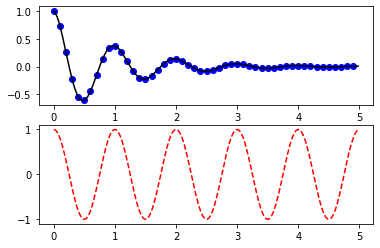

In [80]:
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()

plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

plt.show()

<a href="https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py" target="_blank">Ejemplos de diferentes Graficos con Matplotlib</a>

---

## Visualizacion de Datos de Numpy y Pandas con Matplotlib
Matplotlib se integra muy facilmente con NUmpy y Pandas, para poder mostrar neustros datos de forma rapida y sencilla. 

Construimos una serie de numeros aleatorios con Numpy, para guardar en una **Serie** de Pandas.

In [81]:
import pandas as pd
import numpy as np

In [129]:
size, scale = 1000, 10
muestra = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

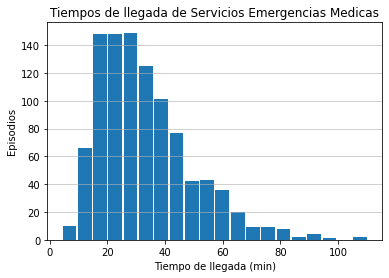

In [190]:
muestra.plot.hist(bins=20, rwidth=0.9)

plt.title('Tiempos de llegada de Servicios Emergencias Medicas')
plt.xlabel('Tiempo de llegada (min)')
plt.ylabel('Episodios')
plt.grid(axis='y', alpha=0.75)


Para ir encaminando nuestro estudio enfocado a resolver un problema, volvamos al Dataset de informacion global de COVID.

In [155]:
global_covid_df = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')

In [156]:
global_covid_df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
66970,2020-10-09,ZW,Zimbabwe,AFRO,32,7951,0,229
66971,2020-10-10,ZW,Zimbabwe,AFRO,43,7994,0,229
66972,2020-10-11,ZW,Zimbabwe,AFRO,0,7994,0,229
66973,2020-10-12,ZW,Zimbabwe,AFRO,17,8011,1,230


Limpiamos un poco el DataFrame.

In [157]:
ignorar_columnas = [
    ' WHO_region',
    ' Cumulative_cases',
    ' New_deaths',
    ' Cumulative_deaths'
]

global_covid_df.drop(ignorar_columnas, inplace=True, axis=1)

In [158]:
global_covid_df.rename(columns={
    'Date_reported': 'fecha',
    ' Country_code': 'cod_pais',
    ' Country': 'pais',
    ' New_cases': 'casos_nuevos'
}, inplace=True)
global_covid_df.set_index('fecha', inplace=True)
global_covid_df

,cod_pais,pais,casos_nuevos
fecha,,,
2020-01-03,AF,Afghanistan,0
2020-01-04,AF,Afghanistan,0
2020-01-05,AF,Afghanistan,0
2020-01-06,AF,Afghanistan,0
2020-01-07,AF,Afghanistan,0
...,...,...,...
2020-10-09,ZW,Zimbabwe,32
2020-10-10,ZW,Zimbabwe,43
2020-10-11,ZW,Zimbabwe,0


In [163]:
global_por_fecha = global_covid_df.groupby('fecha').sum()

In [164]:
global_por_fecha

,casos_nuevos
fecha,
2020-01-03,0
2020-01-04,1
2020-01-05,0
2020-01-06,3
2020-01-07,0
...,...
2020-10-09,362411
2020-10-10,382311
2020-10-11,352372


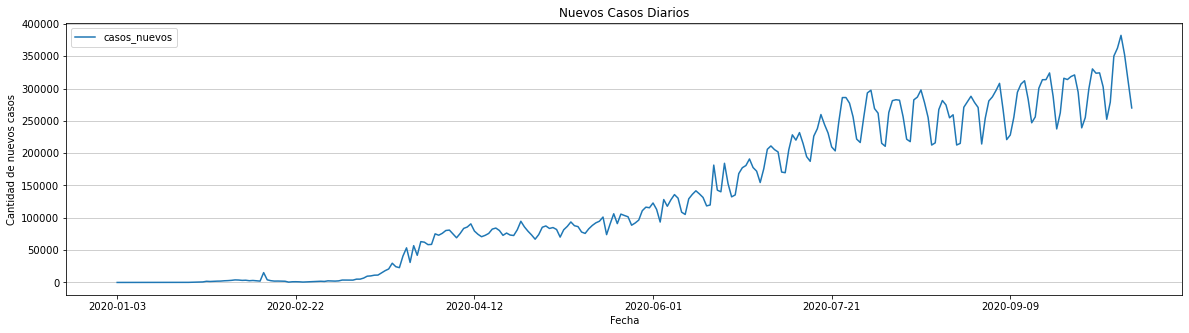

In [180]:
global_por_fecha.plot(figsize=(20, 5))

plt.title('Nuevos Casos Diarios')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de nuevos casos')
plt.grid(axis='y', alpha=0.75)

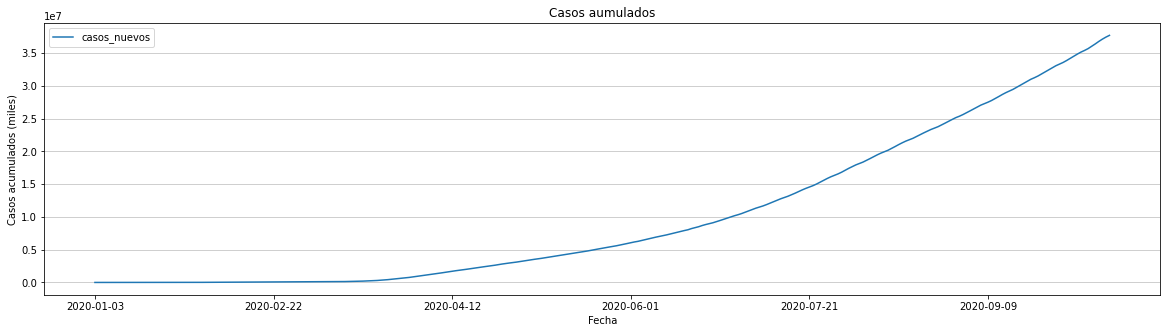

In [185]:
global_por_fecha.cumsum().plot(figsize=(20, 5))

plt.title('Casos aumulados')
plt.xlabel('Fecha')
plt.ylabel('Casos acumulados (miles)')
plt.grid(axis='y', alpha=0.75)

Si bien es una forma bastante "directa" de visualizar datos de Pandas, podemos observar algunas limitacion, como por ejemplo la falta de interactividad de los graficos.

Para mejorar nuestras visualizaciones de datos, es recomendable usar Plotly.

---

## Instalar librerías con PIP y CONDA

Como adelantamos, al usar Anaconda, muchas de las librerias que se usan para la Ciencia de Datos y Finanzas ya vienen incluidas en nuestra descarga.

Pero como este no es siempre el caso, debemos aprender a descargar librerías de Python usando los administradores de paqeutes.

Un administrador de paquetes es un programa que se utiliza para descargar, instalar y administrar paquetes de software escritos en Python.

La gran mayoria de estos paquetes, los encontramos en <a href="https://pypi.org/" target="_blank">Python Package Index</a> cuando usamos PIP; y en <a href="https://anaconda.org/" target="_blank">Anaconda Cloud</a> cuando usamos CONDA.

Para instalar un paquete entonces, usando PIP o CONDA, tenemos las siguientes opciones:
* Desde la terminal:

``` pip install plotly ```

``` conda install plotly ```

* Desde JupyterNotebook en una celda de codigo:

```!pip install plotly ```

```!conda install plotly ```


---